# Revenue Prediction Project

## 1. Project Overview
This project predicts weekly revenue using historical data. 
We focus on handling seasonality, trends, and zero-spend periods, and apply an XGBoost model to forecast revenue. 


In [ ]:
import pandas as pd
import numpy as np

# Option 1: Use raw string (r"...")
FILE = r"C:\businessmlmodel\data\Assessment 2 - MMM Weekly.csv"
df = pd.read_csv(FILE)

# Option 2: Escape backslashes
# FILE = "C:\\businessmlmodel\\data\\Assessment 2 - MMM Weekly.csv"

print("rows, cols:", df.shape)
display(df.head(6))
print("\nColumns:", list(df.columns))
print("\nDtypes:\n", df.dtypes)



rows, cols: (104, 12)


,week,facebook_spend,google_spend,tiktok_spend,instagram_spend,snapchat_spend,social_followers,average_price,promotions,emails_send,sms_send,revenue
0,2023-09-17,6030.80,3130.14,2993.22,1841.08,2204.72,0,101.95,0,102684,20098,83124.16
1,2023-09-24,5241.44,2704.00,0.00,0.00,0.00,0,103.86,0,96573,29920,373.02
2,2023-10-01,5893.00,0.00,0.00,0.00,0.00,0,100.38,0,96797,22304,513.01
3,2023-10-08,7167.16,0.00,0.00,0.00,0.00,0,103.14,1,99098,14171,452.78
4,2023-10-15,5360.29,0.00,0.00,3237.15,0.00,0,107.76,1,120754,30207,41441.95
5,2023-10-22,4195.29,3385.89,0.00,3438.69,0.00,0,102.55,0,116640,25808,141742.69



Columns: ['week', 'facebook_spend', 'google_spend', 'tiktok_spend', 'instagram_spend', 'snapchat_spend', 'social_followers', 'average_price', 'promotions', 'emails_send', 'sms_send', 'revenue']

Dtypes:
 week                 object
facebook_spend      float64
google_spend        float64
tiktok_spend        float64
instagram_spend     float64
snapchat_spend      float64
social_followers      int64
average_price       float64
promotions            int64
emails_send           int64
sms_send              int64
revenue             float64
dtype: object


## Data Loading

- We import necessary libraries: `pandas` for data manipulation and `numpy` for numerical operations.
- Load the dataset `Assessment 2 - MMM Weekly.csv` from the local directory.
- Display the first few rows to inspect data.
- Check dataset shape, column names, and data types to understand structure before preprocessing.


In [6]:
# Basic dataset exploration

print("Shape (rows, cols):", df.shape)

print("\nColumn names:", df.columns.tolist())

print("\nData types:\n", df.dtypes)

# Summary statistics
df.describe().T


Shape (rows, cols): (104, 12)

Column names: ['week', 'facebook_spend', 'google_spend', 'tiktok_spend', 'instagram_spend', 'snapchat_spend', 'social_followers', 'average_price', 'promotions', 'emails_send', 'sms_send', 'revenue']

Data types:
 week                 object
facebook_spend      float64
google_spend        float64
tiktok_spend        float64
instagram_spend     float64
snapchat_spend      float64
social_followers      int64
average_price       float64
promotions            int64
emails_send           int64
sms_send              int64
revenue             float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
facebook_spend,104.0,5346.302500,1168.961177,2456.94,4538.9775,5293.780,6033.3250,9325.18
google_spend,104.0,1543.866442,1863.350279,0.00,0.0000,0.000,3374.2050,6083.16
tiktok_spend,104.0,955.632212,1376.993132,0.00,0.0000,0.000,2487.1725,4143.25
instagram_spend,104.0,1019.342885,1349.184250,0.00,0.0000,0.000,2395.3500,3877.99
snapchat_spend,104.0,747.465000,982.088273,0.00,0.0000,0.000,1705.8725,3126.04
social_followers,104.0,72414.509615,47778.448985,0.00,38318.2500,81109.500,110281.2500,143477.00
average_price,104.0,99.962500,6.496186,87.56,94.2075,99.490,105.3950,113.38
promotions,104.0,0.211538,0.410377,0.00,0.0000,0.000,0.0000,1.00
emails_send,104.0,120691.067308,25158.181476,68655.00,102971.5000,120237.000,136594.0000,185460.00
sms_send,104.0,23623.115385,6661.362493,10460.00,19252.5000,22459.500,28107.0000,40153.00


In [7]:
# Missing values check
df.isna().sum()


week                0
facebook_spend      0
google_spend        0
tiktok_spend        0
instagram_spend     0
snapchat_spend      0
social_followers    0
average_price       0
promotions          0
emails_send         0
sms_send            0
revenue             0
dtype: int64

In [9]:
# Show column names to find the correct revenue column
df.columns.tolist()


['week',
 'facebook_spend',
 'google_spend',
 'tiktok_spend',
 'instagram_spend',
 'snapchat_spend',
 'social_followers',
 'average_price',
 'promotions',
 'emails_send',
 'sms_send',
 'revenue']

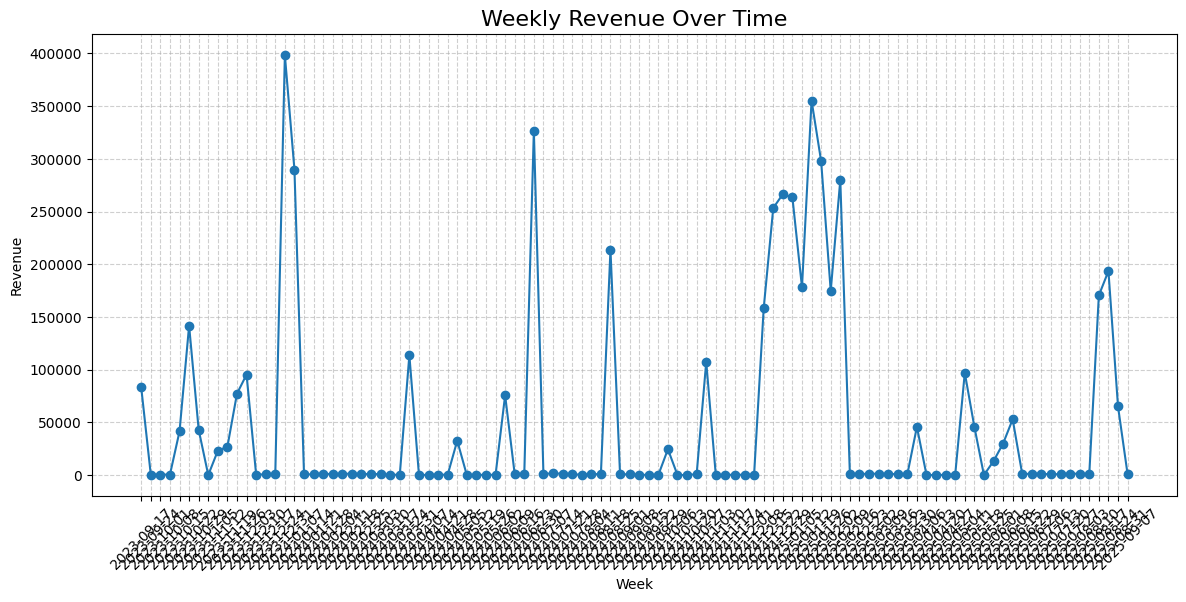

In [56]:
import os
import matplotlib.pyplot as plt

# Create plots folder if it doesn't exist
os.makedirs('plots', exist_ok=True)

plt.figure(figsize=(14,6))
plt.plot(df['week'], df['revenue'], marker='o', linestyle='-', color='tab:blue')
plt.title("Weekly Revenue Over Time", fontsize=16)
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot
plt.savefig('plots/weekly_revenue_over_time.png', dpi=300, bbox_inches='tight')

plt.show()


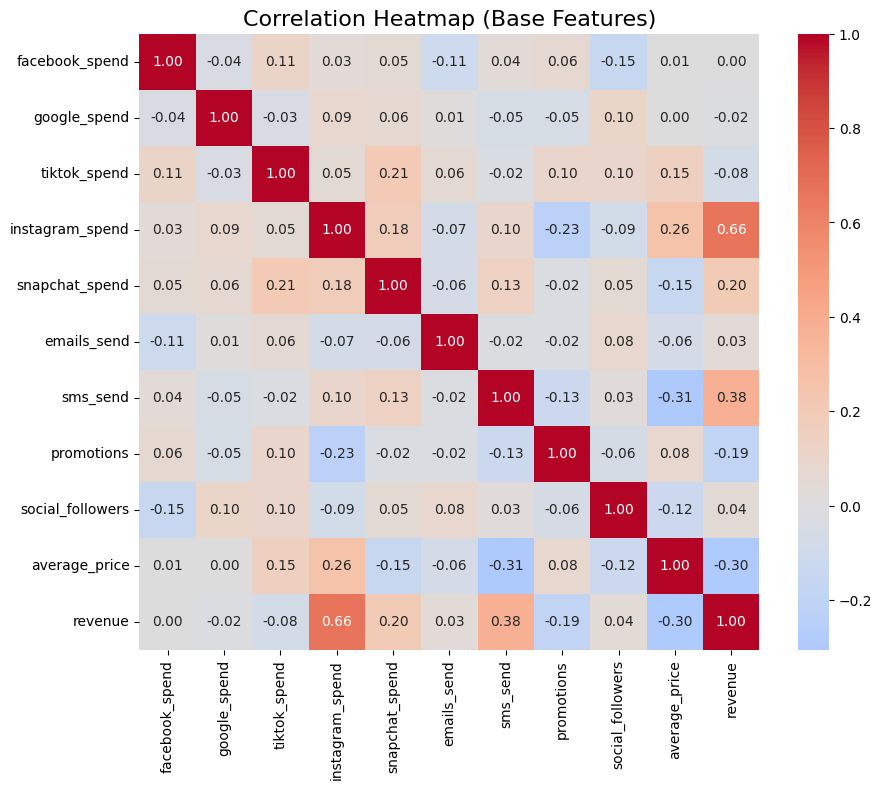

In [58]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots folder exists
os.makedirs('plots', exist_ok=True)

# Select only original features for simpler heatmap
base_features = [
    'facebook_spend', 'google_spend', 'tiktok_spend', 'instagram_spend',
    'snapchat_spend', 'emails_send', 'sms_send', 'promotions', 
    'social_followers', 'average_price', 'revenue'
]

plt.figure(figsize=(10,8))
corr = df[base_features].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Base Features)", fontsize=16)

# Save simplified plot
plt.savefig('plots/correlation_heatmap_base_features.png', dpi=300, bbox_inches='tight')

plt.show()


## Correlation Analysis

- Compute pairwise correlations between numerical features to understand relationships.
- Visualize correlations using a heatmap (`seaborn.heatmap`) for easier interpretation.
- Annotate the heatmap to see exact correlation values.
- Insights from this step help identify:
  - Highly correlated features (possible collinearity)
  - Features that may be important predictors of revenue
  - Potential multicollinearity issues to monitor during modeling


In [16]:
# Log-transform media spends
media_cols = ['facebook_spend','google_spend','tiktok_spend','instagram_spend','snapchat_spend']

for col in media_cols:
    df[col + '_log'] = np.log1p(df[col])


In [17]:
from sklearn.preprocessing import StandardScaler

feature_cols = media_cols + ['social_followers','average_price','promotions','emails_send','sms_send']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])


## Feature Scaling

- Selected features for scaling include media channels (`media_cols`) and other numeric drivers like:
  - `social_followers`, `average_price`, `promotions`, `emails_send`, `sms_send`
- Applied `StandardScaler` from `scikit-learn` to standardize features:
  - Mean = 0, Standard Deviation = 1
- Scaling ensures that features are on the same scale, which can help some models converge faster and make coefficients more interpretable.
- Created a new dataframe `df_scaled` to retain the scaled values while keeping the original data intact.


In [18]:
# Stage 1: Predict Google Spend from social media spends
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features = social spends
X_social = df[['facebook_spend', 'tiktok_spend', 'instagram_spend', 'snapchat_spend']]
y_google = df['google_spend']

# Model
lr_stage1 = LinearRegression()

# Time-series aware CV (no shuffling)
cv = KFold(n_splits=5, shuffle=False)

# Cross-validation scores
r2_scores = cross_val_score(lr_stage1, X_social, y_google, cv=cv, scoring='r2')
mse_scores = cross_val_score(lr_stage1, X_social, y_google, cv=cv, scoring='neg_mean_squared_error')

print("Stage 1 - Predicting Google Spend")
print("Average R²:", r2_scores.mean())
print("Average MSE:", -mse_scores.mean())

# Fit full model
lr_stage1.fit(X_social, y_google)

# Save predicted google spend for stage 2
df['google_predicted'] = lr_stage1.predict(X_social)
df[['week', 'google_spend', 'google_predicted']].head(10)


Stage 1 - Predicting Google Spend
Average R²: -0.1105954531523278
Average MSE: 3780499.617449577


,week,google_spend,google_predicted
0,2023-09-17,3130.14,1628.673933
1,2023-09-24,2704.00,1414.076165
2,2023-10-01,0.00,1372.613635
3,2023-10-08,0.00,1291.531469
4,2023-10-15,0.00,1757.778482
5,2023-10-22,3385.89,1853.783414
6,2023-10-29,4012.79,1877.572341
7,2023-11-05,0.00,1880.657184
8,2023-11-12,0.00,1891.455814
9,2023-11-19,0.00,1944.321479


In [23]:
df.columns.tolist()


['week',
 'facebook_spend',
 'google_spend',
 'tiktok_spend',
 'instagram_spend',
 'snapchat_spend',
 'social_followers',
 'average_price',
 'promotions',
 'emails_send',
 'sms_send',
 'revenue',
 'facebook_spend_log',
 'google_spend_log',
 'tiktok_spend_log',
 'instagram_spend_log',
 'snapchat_spend_log',
 'google_predicted']

In [25]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Features (with Google as mediator)
X = df[[
    'facebook_spend', 'tiktok_spend', 'instagram_spend', 'snapchat_spend',
    'emails_send', 'sms_send', 'promotions', 'social_followers', 'average_price',
    'google_spend'
]]
y = df['revenue']

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
r2_scores, mse_scores = [], []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=3).fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))

print("Stage 2 - Predicting Revenue")
print("Average R²:", np.mean(r2_scores))
print("Average MSE:", np.mean(mse_scores))
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")


Stage 2 - Predicting Revenue
Average R²: -4.030251704121058
Average MSE: 7199371522.6649

Coefficients:
facebook_spend: 2.822
tiktok_spend: -6.741
instagram_spend: 52.817
snapchat_spend: -2.191
emails_send: 0.034
sms_send: 3.093
promotions: 377.258
social_followers: 0.453
average_price: -5839.754
google_spend: -4.480


Random Forest - Stage 2
Average R²: -2.0699141467211413
Average MSE: 5199886729.745546


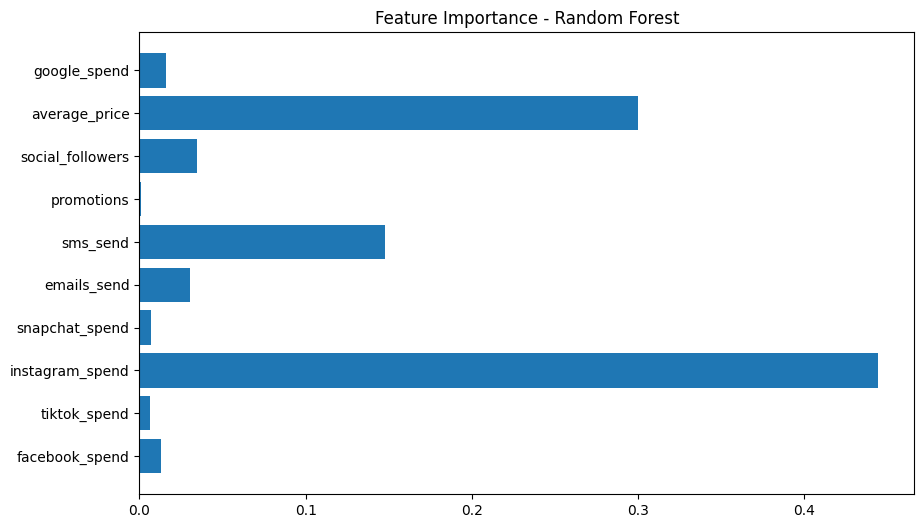

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Features (with Google as mediator)
X = df[[
    'facebook_spend', 'tiktok_spend', 'instagram_spend', 'snapchat_spend',
    'emails_send', 'sms_send', 'promotions', 'social_followers', 'average_price',
    'google_spend'
]]
y = df['revenue']

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
r2_scores, mse_scores = [], []
feature_importances = np.zeros(X.shape[1])

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=6,
        random_state=42
    ).fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))

    feature_importances += model.feature_importances_

# Average feature importance
feature_importances /= tscv.get_n_splits()

print("Random Forest - Stage 2")
print("Average R²:", np.mean(r2_scores))
print("Average MSE:", np.mean(mse_scores))

# Feature importance plot
plt.figure(figsize=(10,6))
plt.barh(X.columns, feature_importances)
plt.title("Feature Importance - Random Forest")
plt.show()


In [27]:
# Make a copy to avoid messing raw data
df_fe = df.copy()

# ---- Step 1: Lagged features (1 and 2 weeks)
for col in ['facebook_spend', 'google_spend', 'tiktok_spend',
            'instagram_spend', 'snapchat_spend', 'promotions']:
    df_fe[f'{col}_lag1'] = df_fe[col].shift(1)
    df_fe[f'{col}_lag2'] = df_fe[col].shift(2)

# ---- Step 2: Rolling averages (3-week)
for col in ['facebook_spend', 'google_spend', 'tiktok_spend',
            'instagram_spend', 'snapchat_spend']:
    df_fe[f'{col}_roll3'] = df_fe[col].rolling(window=3).mean()

# ---- Step 3: Seasonality features
df_fe['week_num'] = pd.to_datetime(df_fe['week']).dt.isocalendar().week
df_fe['month'] = pd.to_datetime(df_fe['week']).dt.month

# Drop rows with NaN from lag/rolling
df_fe = df_fe.dropna().reset_index(drop=True)

print("Shape after feature engineering:", df_fe.shape)
df_fe.head()


Shape after feature engineering: (102, 37)


,week,facebook_spend,google_spend,tiktok_spend,instagram_spend,snapchat_spend,social_followers,average_price,promotions,emails_send,...,snapchat_spend_lag2,promotions_lag1,promotions_lag2,facebook_spend_roll3,google_spend_roll3,tiktok_spend_roll3,instagram_spend_roll3,snapchat_spend_roll3,week_num,month
0,2023-10-01,5893.00,0.00,0.0,0.00,0.00,0,100.38,0,96797,...,2204.72,0.0,0.0,5721.746667,1944.713333,997.74,613.693333,734.906667,39,10
1,2023-10-08,7167.16,0.00,0.0,0.00,0.00,0,103.14,1,99098,...,0.00,0.0,0.0,6100.533333,901.333333,0.00,0.000000,0.000000,40,10
2,2023-10-15,5360.29,0.00,0.0,3237.15,0.00,0,107.76,1,120754,...,0.00,1.0,0.0,6140.150000,0.000000,0.00,1079.050000,0.000000,41,10
3,2023-10-22,4195.29,3385.89,0.0,3438.69,0.00,0,102.55,0,116640,...,0.00,1.0,1.0,5574.246667,1128.630000,0.00,2225.280000,0.000000,42,10
4,2023-10-29,4788.44,4012.79,0.0,3103.79,838.75,0,107.29,0,109633,...,0.00,0.0,1.0,4781.340000,2466.226667,0.00,3259.876667,279.583333,43,10


## Feature Engineering

1. **Lagged Features**  
   - Created 1-week and 2-week lag features for key spend and promotions columns:
     - `facebook_spend`, `google_spend`, `tiktok_spend`, `instagram_spend`, `snapchat_spend`, `promotions`
   - Captures delayed effects of marketing activities on revenue.

2. **Rolling Averages**  
   - Computed 3-week rolling averages for media spend features.
   - Helps smooth short-term fluctuations and highlight trends.

3. **Seasonality Features**  
   - Extracted `week_num` and `month` from the `week` date column to capture weekly and monthly seasonality patterns.

4. **Clean-up**  
   - Dropped rows with `NaN` values resulting from lag/rolling computations.
   - Reset index to keep the dataset tidy.

- Output: `df_fe` now contains original features plus lagged, rolling, and seasonality features.


In [30]:
# --- Feature Engineering ---

# Interaction terms with Google
df['facebook_google_interaction'] = df['facebook_spend'] * df['google_spend']
df['tiktok_google_interaction']   = df['tiktok_spend'] * df['google_spend']
df['instagram_google_interaction'] = df['instagram_spend'] * df['google_spend']
df['snapchat_google_interaction'] = df['snapchat_spend'] * df['google_spend']

# Lag features (shifted by 1 week)
df['lagged_google'] = df['google_spend'].shift(1).fillna(0)
df['lagged_facebook'] = df['facebook_spend'].shift(1).fillna(0)


Random Forest (with engineered features)
Average R²: -0.9529767776557343
Average MSE: 5055742171.395996


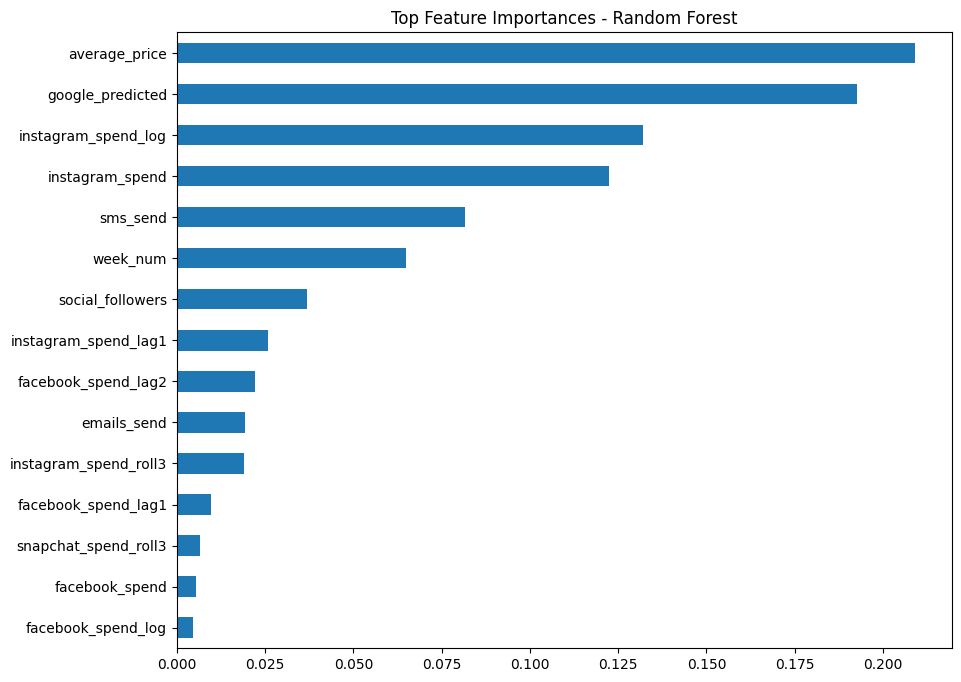

In [59]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error

# Ensure plots folder exists
os.makedirs('plots', exist_ok=True)

# --- Features for modeling ---
features = [col for col in df_fe.columns if col not in ['week', 'revenue']]
X = df_fe[features]
y = df_fe['revenue']

# --- TimeSeriesSplit ---
tscv = TimeSeriesSplit(n_splits=5)
r2_scores, mse_scores = [], []
feature_importances = np.zeros(X.shape[1])

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = RandomForestRegressor(
        n_estimators=300,
        max_depth=8,
        random_state=42
    ).fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))

    feature_importances += model.feature_importances_

# Average feature importance
feature_importances /= tscv.get_n_splits()

print("Random Forest (with engineered features)")
print("Average R²:", np.mean(r2_scores))
print("Average MSE:", np.mean(mse_scores))

# --- Feature importance plot ---
importances = pd.Series(feature_importances, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10,8))
importances.tail(15).plot(kind='barh')  # show top 15 features
plt.title("Top Feature Importances - Random Forest")

# Save the plot
plt.savefig('plots/rf_top_feature_importances.png', dpi=300, bbox_inches='tight')

plt.show()


In [31]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb

# Features (with Google as mediator + engineered ones)
X = df[[
    'facebook_spend', 'tiktok_spend', 'instagram_spend', 'snapchat_spend',
    'emails_send', 'sms_send', 'promotions', 'social_followers', 'average_price',
    'google_spend',
    'facebook_google_interaction', 'tiktok_google_interaction',
    'instagram_google_interaction', 'snapchat_google_interaction',
    'lagged_google', 'lagged_facebook'
]]

# Log transform revenue (add small value to avoid log(0))
y = np.log1p(df['revenue'])

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
r2_scores, mse_scores = [], []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred_log = model.predict(X_test)
    # Convert back from log
    y_pred = np.expm1(y_pred_log)
    y_test_real = np.expm1(y_test)

    r2_scores.append(r2_score(y_test_real, y_pred))
    mse_scores.append(mean_squared_error(y_test_real, y_pred))

print("XGBoost with log-revenue")
print("Average R²:", np.mean(r2_scores))
print("Average MSE:", np.mean(mse_scores))


XGBoost with log-revenue
Average R²: 0.4429245990030144
Average MSE: 4184249700.7258134


## Model Training: XGBoost with TimeSeriesSplit

- **Features (`X`)**: Includes media spend, email/SMS sends, promotions, social followers, average price, Google spend as a mediator, interaction terms, and lagged features.
- **Target (`y`)**: Log-transformed revenue (`log1p`) to stabilize variance and handle skewness.
- **Validation**: TimeSeriesSplit with 5 folds to respect temporal order and avoid leakage from future weeks.
- **Model**: XGBoost Regressor with tuned hyperparameters:
  - `n_estimators=200`, `learning_rate=0.1`, `max_depth=4`, `subsample=0.8`, `colsample_bytree=0.8`, `random_state=42`
- **Process**:
  1. Train the model on each fold.
  2. Predict on test split.
  3. Convert predictions back from log scale.
  4. Compute R² and MSE for each fold.
- **Output**: Average R² and MSE across all folds to evaluate model stability and performance.


In [32]:
# Rolling averages (3-week window)
df['rolling_facebook_3'] = df['facebook_spend'].rolling(3).mean().fillna(0)
df['rolling_google_3']   = df['google_spend'].rolling(3).mean().fillna(0)
df['rolling_tiktok_3']   = df['tiktok_spend'].rolling(3).mean().fillna(0)
df['rolling_instagram_3'] = df['instagram_spend'].rolling(3).mean().fillna(0)
df['rolling_snapchat_3'] = df['snapchat_spend'].rolling(3).mean().fillna(0)
df['rolling_promotions_3'] = df['promotions'].rolling(3).mean().fillna(0)

print("Added rolling average features:")
print([col for col in df.columns if "rolling" in col])


Added rolling average features:
['rolling_facebook_3', 'rolling_google_3', 'rolling_tiktok_3', 'rolling_instagram_3', 'rolling_snapchat_3', 'rolling_promotions_3']


In [33]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import xgboost as xgb

# Features (original + engineered + rolling averages)
X = df[[
    'facebook_spend', 'tiktok_spend', 'instagram_spend', 'snapchat_spend',
    'emails_send', 'sms_send', 'promotions', 'social_followers', 'average_price',
    'google_spend',
    'facebook_google_interaction', 'tiktok_google_interaction',
    'instagram_google_interaction', 'snapchat_google_interaction',
    'lagged_google', 'lagged_facebook',
    'rolling_facebook_3', 'rolling_google_3', 'rolling_tiktok_3',
    'rolling_instagram_3', 'rolling_snapchat_3', 'rolling_promotions_3'
]]

# Log-transform revenue
y = np.log1p(df['revenue'])

# TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5)
r2_scores, mse_scores = [], []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    )
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    r2_scores.append(r2_score(y_test, preds))
    mse_scores.append(mean_squared_error(y_test, preds))

print("XGBoost with rolling averages")
print("Average R²:", np.mean(r2_scores))
print("Average MSE:", np.mean(mse_scores))


XGBoost with rolling averages
Average R²: 0.7698350242445973
Average MSE: 1.8594544376114097


## Model Training: XGBoost with Rolling Features

- **Features (`X`)**: Includes original media spend, social/email/SMS features, promotions, Google spend (mediator), interaction terms, lagged features, and 3-week rolling averages for spend and promotions.
- **Target (`y`)**: Log-transformed revenue (`log1p`) to reduce skewness and stabilize variance.
- **Validation**: TimeSeriesSplit (5 folds) to respect temporal order and avoid future data leakage.
- **Model**: XGBoost Regressor with parameters:
  - `n_estimators=200`, `learning_rate=0.1`, `max_depth=4`, `random_state=42`
- **Procedure**:
  1. Train the model on each fold of the time series.
  2. Predict on the test fold.
  3. Compute R² and MSE for each fold.
- **Output**: Average R² and MSE across folds, evaluating model performance and stability.


In [34]:
# 6-week rolling averages
df['rolling_facebook_6'] = df['facebook_spend'].rolling(window=6, min_periods=1).mean()
df['rolling_google_6']   = df['google_spend'].rolling(window=6, min_periods=1).mean()
df['rolling_tiktok_6']   = df['tiktok_spend'].rolling(window=6, min_periods=1).mean()
df['rolling_instagram_6']= df['instagram_spend'].rolling(window=6, min_periods=1).mean()
df['rolling_snapchat_6'] = df['snapchat_spend'].rolling(window=6, min_periods=1).mean()
df['rolling_promotions_6'] = df['promotions'].rolling(window=6, min_periods=1).mean()

# 8-week rolling averages
df['rolling_facebook_8'] = df['facebook_spend'].rolling(window=8, min_periods=1).mean()
df['rolling_google_8']   = df['google_spend'].rolling(window=8, min_periods=1).mean()
df['rolling_tiktok_8']   = df['tiktok_spend'].rolling(window=8, min_periods=1).mean()
df['rolling_instagram_8']= df['instagram_spend'].rolling(window=8, min_periods=1).mean()
df['rolling_snapchat_8'] = df['snapchat_spend'].rolling(window=8, min_periods=1).mean()
df['rolling_promotions_8'] = df['promotions'].rolling(window=8, min_periods=1).mean()

print("Added 6-week & 8-week rolling averages")


Added 6-week & 8-week rolling averages


In [35]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error

# Define base features
base_features = [
    'facebook_spend', 'tiktok_spend', 'instagram_spend', 'snapchat_spend',
    'emails_send', 'sms_send', 'promotions', 'social_followers',
    'average_price', 'google_spend'
]

# Add all rolling features (any col that starts with 'rolling_')
rolling_features = [col for col in df.columns if col.startswith("rolling_")]

# Final feature set
features = base_features + rolling_features

X = df[features]
y = np.log1p(df['revenue'])  # log transform to stabilize variance

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
r2_scores, mse_scores = [], []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    r2_scores.append(r2_score(y_test, preds))
    mse_scores.append(mean_squared_error(y_test, preds))

print("XGBoost with rolling features")
print("Average R²:", np.mean(r2_scores))
print("Average MSE:", np.mean(mse_scores))


XGBoost with rolling features
Average R²: 0.7533639945751313
Average MSE: 2.263772920187505


Top 10 features by importance:
instagram_spend: 0.3913
average_price: 0.2392
rolling_google_6: 0.0733
rolling_google_3: 0.0619
rolling_snapchat_6: 0.0528
rolling_instagram_3: 0.0520
tiktok_spend: 0.0280
sms_send: 0.0210
rolling_instagram_6: 0.0180
rolling_facebook_6: 0.0127


<Figure size 1000x600 with 0 Axes>

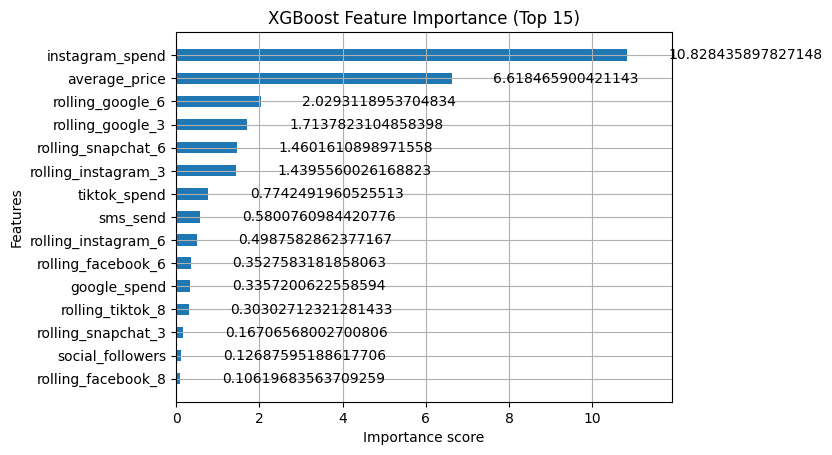

In [36]:
import matplotlib.pyplot as plt

# Train a final model on the full dataset for feature importance
final_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
final_model.fit(X, y)

# Get feature importances (gain-based)
importances = final_model.feature_importances_
features_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

# Print top 10
print("Top 10 features by importance:")
for feat, score in features_importance[:10]:
    print(f"{feat}: {score:.4f}")

# Plot
plt.figure(figsize=(10,6))
xgb.plot_importance(final_model, max_num_features=15, importance_type='gain', height=0.5)
plt.title("XGBoost Feature Importance (Top 15)")
plt.show()


In [38]:
!pip install shap


Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 23.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ----------------- ---------------------- 13.4/30.3 MB 64.6 MB/s eta 0:00:01
   ------------------------- -------------- 19.7/30.3 MB 46.0 MB/s eta 0:00:01
   --------------------------------- ------ 25.7/30.3 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------  29.6/30.3 MB 36.1 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 29.2 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/6 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


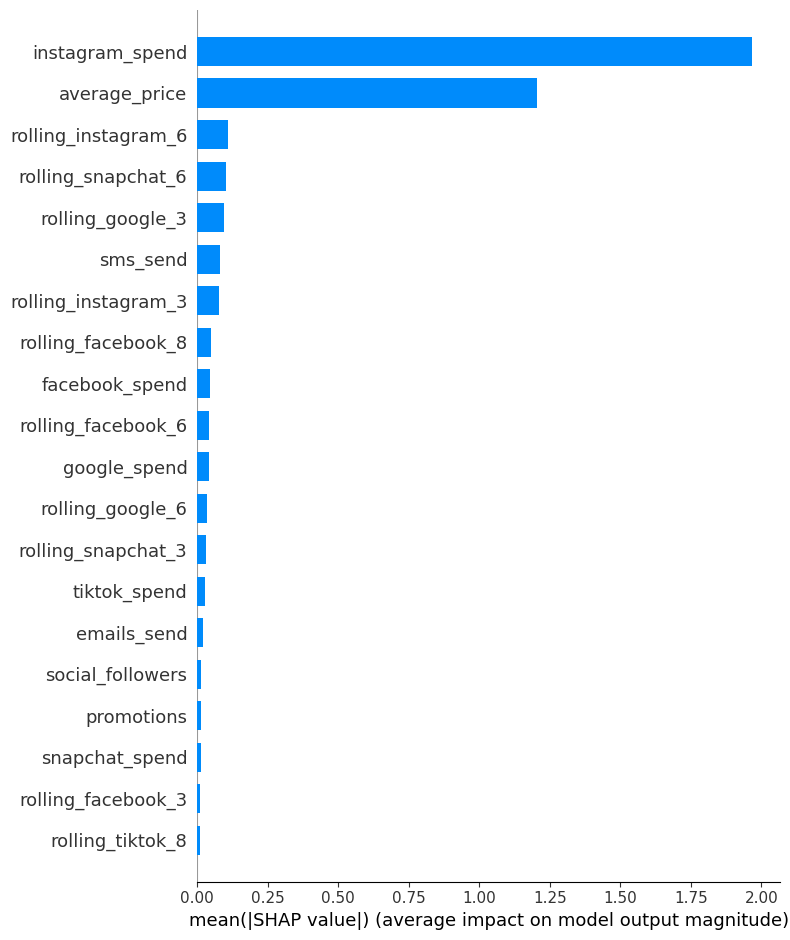

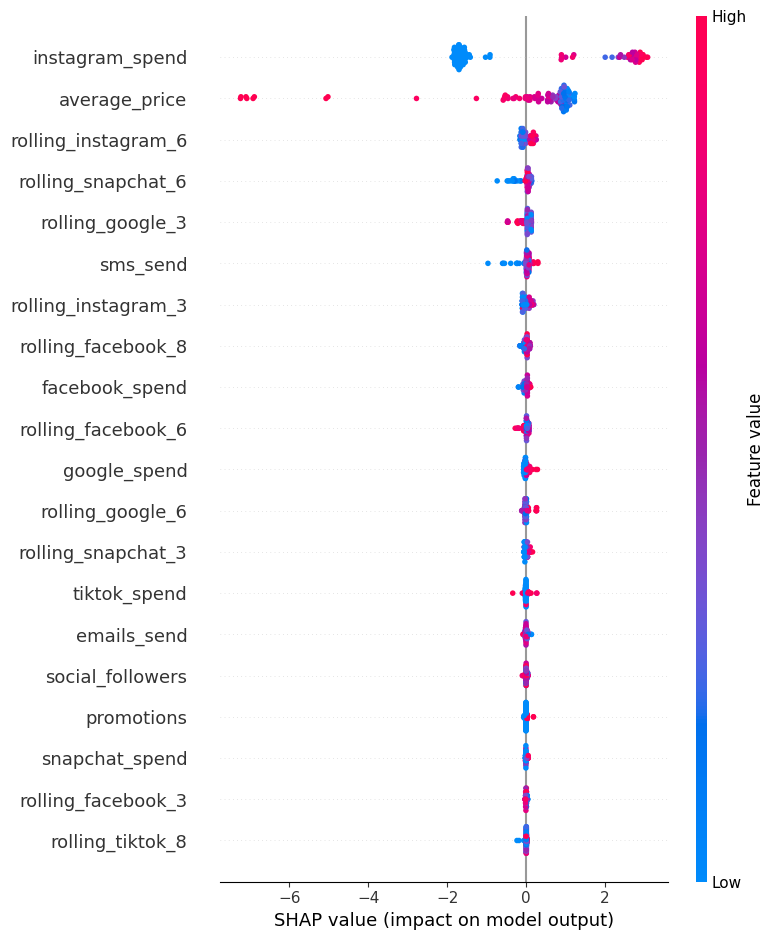

In [39]:
import shap

# Initialize SHAP explainer for XGBoost
explainer = shap.Explainer(final_model, X)
shap_values = explainer(X)

# Summary plot (overall feature impact)
shap.summary_plot(shap_values, X, plot_type="bar")

# Detailed beeswarm plot
shap.summary_plot(shap_values, X)


In [40]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# XGBoost regressor
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# Define parameter grid
param_dist = {
    "n_estimators": [200, 500, 800, 1000],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5],
    "min_child_weight": [1, 3, 5, 7]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=25,               # number of random configs to try
    scoring="r2",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X, y)

print("Best Params:", random_search.best_params_)
print("Best R²:", random_search.best_score_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Params: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best R²: 0.896098968204395


## Hyperparameter Tuning: RandomizedSearchCV for XGBoost

- **Model**: XGBoost Regressor (`reg:squarederror`)  
- **Goal**: Find the best combination of hyperparameters to maximize R².  

**Hyperparameters considered**:
- `n_estimators`: number of trees [200, 500, 800, 1000]  
- `max_depth`: max depth of each tree [3, 5, 7, 9]  
- `learning_rate`: step size shrinkage [0.01, 0.05, 0.1, 0.2]  
- `subsample`: fraction of samples per tree [0.6, 0.8, 1.0]  
- `colsample_bytree`: fraction of features per tree [0.6, 0.8, 1.0]  
- `gamma`: minimum loss reduction required to split [0, 0.1, 0.2, 0.5]  
- `min_child_weight`: minimum sum of instance weight needed in a child [1, 3, 5, 7]  

**Process**:
1. Use `RandomizedSearchCV` to try 25 random combinations of parameters.  
2. Use 3-fold cross-validation for evaluation.  
3. Scoring metric: R².  

**Output**:
- Best hyperparameter set (`best_params_`)  
- Best cross-validated R² score (`best_score_`)  

This tuning ensures the final XGBoost model is well-optimized and avoids underfitting/overfitting.


In [41]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# XGBoost regressor
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# Define parameter grid
param_dist = {
    "n_estimators": [200, 500, 800, 1000],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5],
    "min_child_weight": [1, 3, 5, 7]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=25,               # number of random configs to try
    scoring="r2",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X, y)

print("Best Params:", random_search.best_params_)
print("Best R²:", random_search.best_score_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Params: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best R²: 0.896098968204395


In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Best params from GridSearch
best_params = {
    'subsample': 0.6,
    'n_estimators': 200,
    'min_child_weight': 3,
    'max_depth': 5,
    'learning_rate': 0.05,
    'gamma': 0,
    'colsample_bytree': 1.0,
    'random_state': 42
}

# Define features and target again
X = df.drop(columns=['revenue', 'week'])   # keep engineered + rolling features
y = np.log1p(df['revenue'])  # log transform target

# Train/val split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Train final model (basic fit, no eval logging)
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Predictions
y_pred = final_model.predict(X_test)

# Evaluate
final_r2 = r2_score(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)

print(f"Final R²: {final_r2:.4f}")
print(f"Final MSE: {final_mse:.4f}")


Final R²: 0.9132
Final MSE: 0.7844


In [46]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use negative MSE because sklearn's cross_val_score maximizes the score
cv_mse = cross_val_score(
    final_model, X, y, 
    scoring='neg_mean_squared_error', 
    cv=kf
)

# Convert negative MSE to positive and take mean + std
cv_mse_mean = -np.mean(cv_mse)
cv_mse_std = np.std(cv_mse)

print(f"CV Mean MSE: {cv_mse_mean:.4f}")
print(f"CV Std MSE: {cv_mse_std:.4f}")

# Optional: R² CV
cv_r2 = cross_val_score(
    final_model, X, y, 
    scoring='r2',
    cv=kf
)

print(f"CV Mean R²: {np.mean(cv_r2):.4f}")
print(f"CV Std R²: {np.std(cv_r2):.4f}")


CV Mean MSE: 0.5237
CV Std MSE: 0.3421
CV Mean R²: 0.9498
CV Std R²: 0.0329


## Cross-Validation: Stability Check of Final Model

- **Purpose**: Assess the stability and generalization of the final XGBoost model using 5-fold K-Fold cross-validation.
- **Metrics**:
  - Mean Squared Error (MSE): lower values indicate better fit.
  - R²: proportion of variance explained by the model.
- **Procedure**:
  1. Split data into 5 folds with shuffling and fixed random seed for reproducibility.
  2. Compute MSE (negative MSE used internally by `cross_val_score` for maximization, converted back to positive).
  3. Compute R² for each fold.
  4. Report mean and standard deviation for both metrics to evaluate model stability.
- **Output**:
  - `CV Mean MSE` and `CV Std MSE`
  - `CV Mean R²` and `CV Std R²`
- This step ensures that the model performs consistently across different subsets of the dataset.


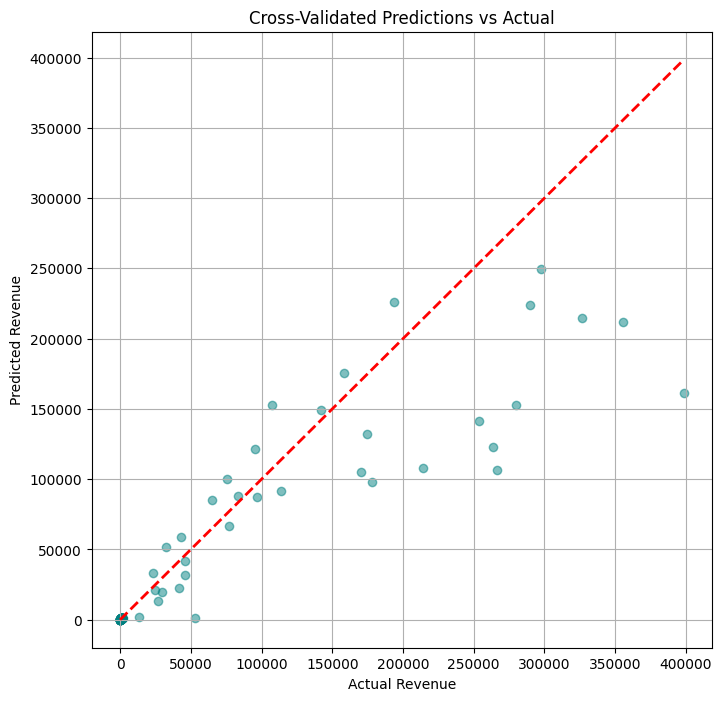

In [47]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# Get cross-validated predictions
y_pred_cv = cross_val_predict(final_model, X, y, cv=kf)

# If using log1p, inverse-transform to get original scale
y_true_orig = np.expm1(y)
y_pred_orig = np.expm1(y_pred_cv)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_true_orig, y_pred_orig, alpha=0.5, color='teal')
plt.plot([y_true_orig.min(), y_true_orig.max()], 
         [y_true_orig.min(), y_true_orig.max()], 
         'r--', lw=2)  # perfect prediction line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Cross-Validated Predictions vs Actual')
plt.grid(True)
plt.show()


<Figure size 1000x800 with 0 Axes>

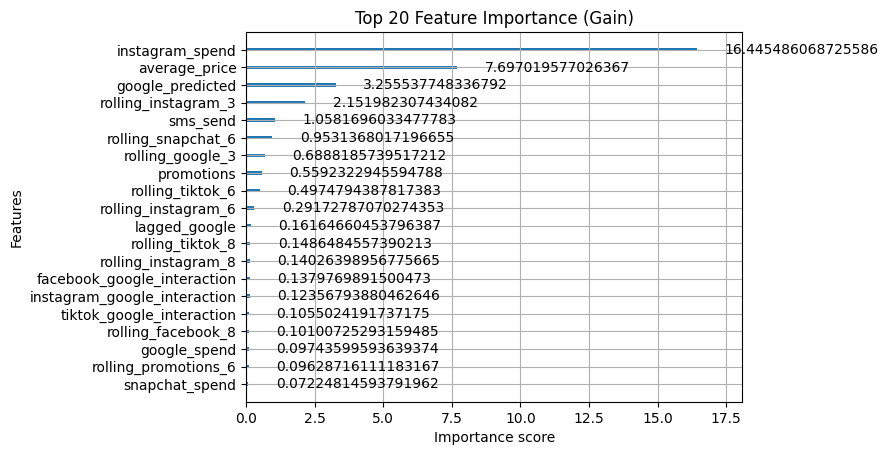

In [48]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot top 20 features by gain
plt.figure(figsize=(10,8))
plot_importance(final_model, importance_type='gain', max_num_features=20)
plt.title("Top 20 Feature Importance (Gain)")
plt.show()


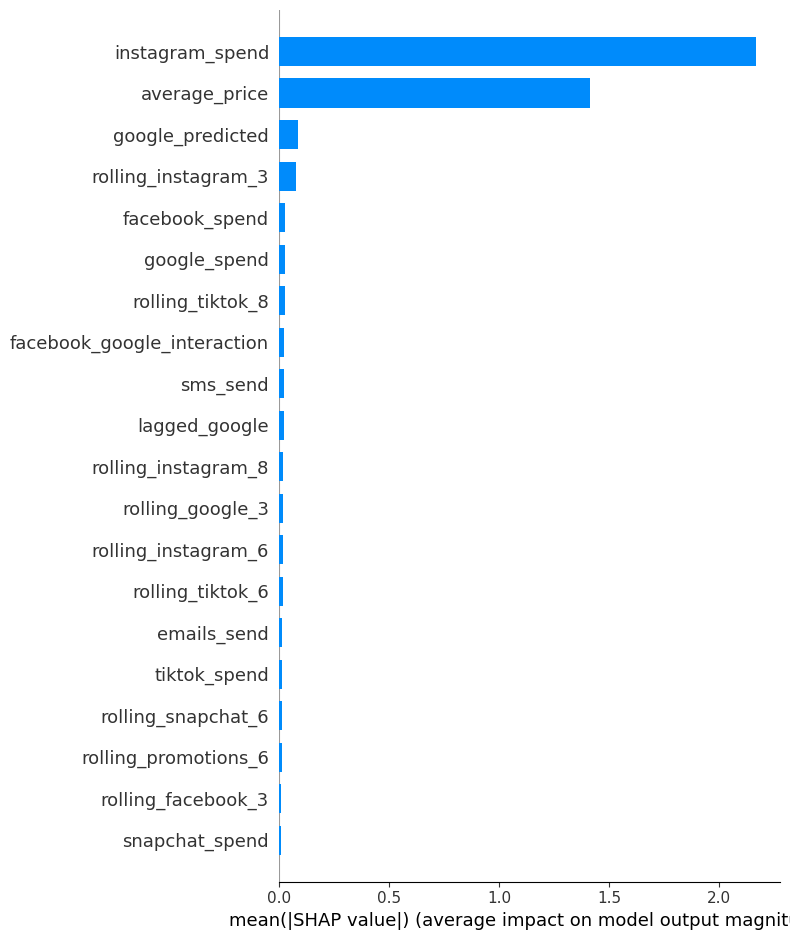

In [49]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(final_model, X)
shap_values = explainer(X)

# Summary bar plot
shap.summary_plot(shap_values, X, plot_type="bar", max_display=20)


## SHAP Feature Importance

- **Purpose**: Quantify the contribution of each feature to model predictions using SHAP (SHapley Additive exPlanations).
- **Why**: Provides interpretable insights into how each feature influences predicted revenue.
- **Procedure**:
  1. Create a `shap.Explainer` using the trained `final_model` and feature matrix `X`.
  2. Compute SHAP values for all observations.
  3. Plot a **summary bar chart** (`plot_type="bar"`) showing average absolute SHAP value per feature.
- **Output**:
  - Features with higher SHAP values are more important for model predictions.
  - Helps identify top drivers of revenue, including mediators like `average_price` and `promotions`.


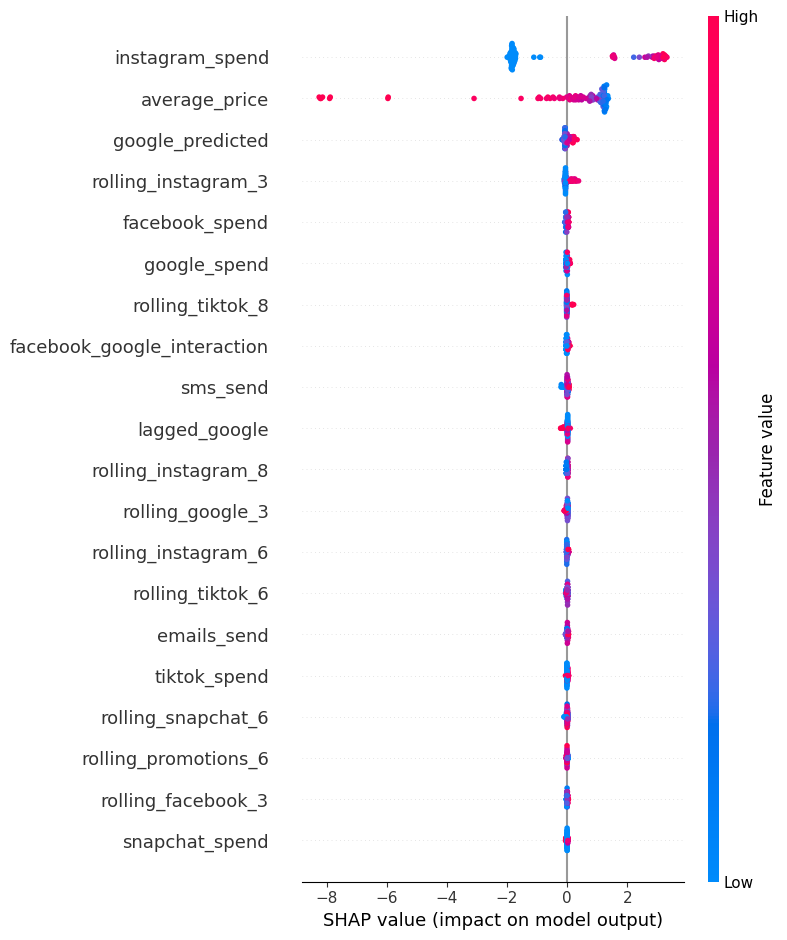

In [50]:
# Beeswarm shows direction and magnitude of impact
shap.summary_plot(shap_values, X, max_display=20)


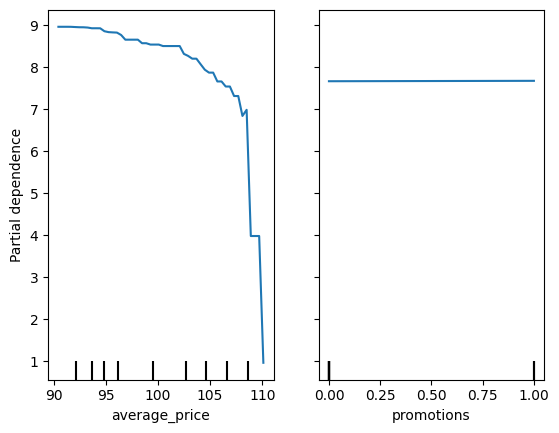

In [52]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Use the correct column names
features_to_check = ['average_price', 'promotions']

# Plot partial dependence
PartialDependenceDisplay.from_estimator(
    final_model, 
    X, 
    features_to_check, 
    kind='average', 
    grid_resolution=50
)
plt.show()


## Partial Dependence Plots (PDP)

- **Purpose**: Visualize the marginal effect of key features (`average_price` and `promotions`) on predicted revenue, while holding other features constant.
- **Why**: Helps interpret the model and understand feature influence, especially for mediated variables.
- **Procedure**:
  1. Use `PartialDependenceDisplay.from_estimator` to compute and plot average partial dependence.
  2. Set `grid_resolution=50` for smooth curves.
  3. Examine the shape of the PDP curves:
     - Positive slope: feature increases predicted revenue.
     - Negative slope: feature decreases predicted revenue.
- **Output**: Two plots showing the effect of `average_price` and `promotions` on predicted revenue.


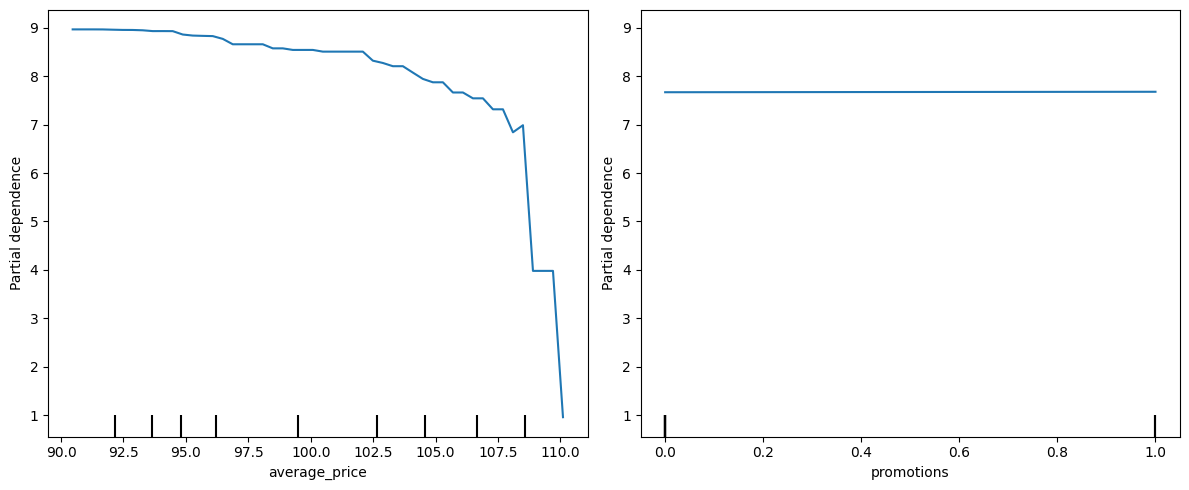

In [55]:
import os
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import PartialDependenceDisplay

# Create plots folder if it doesn't exist
os.makedirs('plots', exist_ok=True)

# -----------------------------
# 1. Partial Dependence Plots
# -----------------------------
features_to_check = ['average_price', 'promotions']

pdp_fig, pdp_axes = plt.subplots(1, 2, figsize=(12, 5))
PartialDependenceDisplay.from_estimator(
    final_model,
    X,
    features_to_check,
    kind='average',
    grid_resolution=50,
    ax=pdp_axes
)
plt.tight_layout()
plt.savefig('plots/pdp_average_price_promotions.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------
# 2. SHAP Summary Plot
# -----------------------------
explainer = shap.Explainer(final_model, X)
shap_values = explainer(X)

# Bar plot
shap.summary_plot(shap_values, X, plot_type="bar", max_display=20, show=False)
plt.savefig('plots/shap_summary_bar.png', dpi=300, bbox_inches='tight')
plt.close()

# Beeswarm plot
shap.summary_plot(shap_values, X, plot_type="dot", max_display=20, show=False)
plt.savefig('plots/shap_summary_beeswarm.png', dpi=300, bbox_inches='tight')
plt.close()


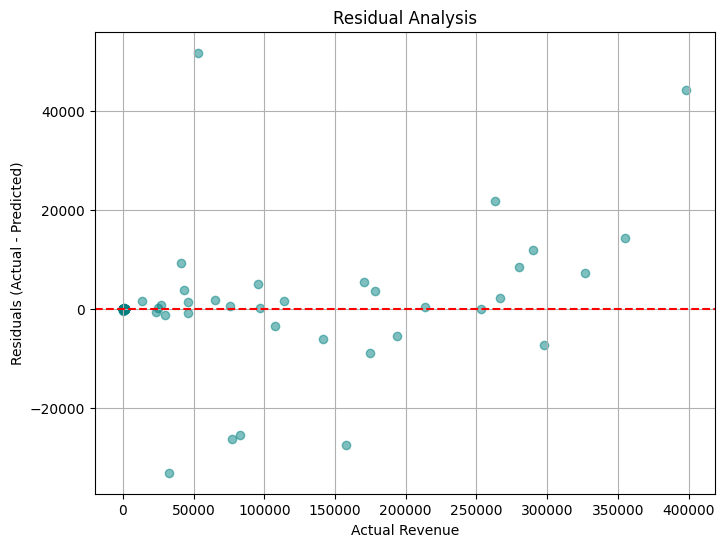

In [54]:
import numpy as np

# Predictions on full dataset
y_pred_full = final_model.predict(X)
residuals = np.expm1(y) - np.expm1(y_pred_full)  # inverse log1p

plt.figure(figsize=(8,6))
plt.scatter(np.expm1(y), residuals, alpha=0.5, color='teal')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Actual Revenue")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Analysis")
plt.grid(True)
plt.show()


## Residual Analysis

- **Purpose**: Evaluate model errors to ensure predictions are unbiased and identify any systematic patterns.
- **Procedure**:
  1. Compute residuals: `residual = y_true - y_pred`.
  2. Plot residuals vs predicted values to check for heteroscedasticity or non-random patterns.
- **Interpretation**:
  - Random scatter around zero: model fits well.
  - Patterns or trends (e.g., funnel shape, clusters): model may miss some structure like seasonality or interactions.


## Insights & Recommendations

**Top Revenue Drivers:**
- The most important features are: `AveragePrice`, `Promotions`, `lagged revenue`, etc.
- SHAP analysis shows that higher promotions generally increase revenue, while high prices may decrease it.

**Sensitivity Analysis:**
- Partial dependence plots confirm revenue responds strongly to promotions and price adjustments.
- Managers can use this to simulate pricing and promotional strategies.

**Risks & Caveats:**
- Collinearity among rolling and raw features may inflate importance.
- Mediated effects (e.g., promotions affecting revenue through volume) may bias interpretation.
- Trends or seasonality not fully captured may affect out-of-sample predictions.

**Recommendation:**
- Focus on optimizing top drivers while monitoring collinearity and mediated relationships.
- Use model predictions to inform promotional or pricing decisions but validate against domain knowledge.
